# PTBX Load and visualization

In [9]:
from data import ptbxl
import os
from utils import setCWDToProjectDir
from model.IMLE_net.preprocessing.preprocess import preprocess


In [10]:
setCWDToProjectDir()
print(f"Our current working directory is {os.getcwd()}")

Our current working directory is D:\cardiovascular-ai


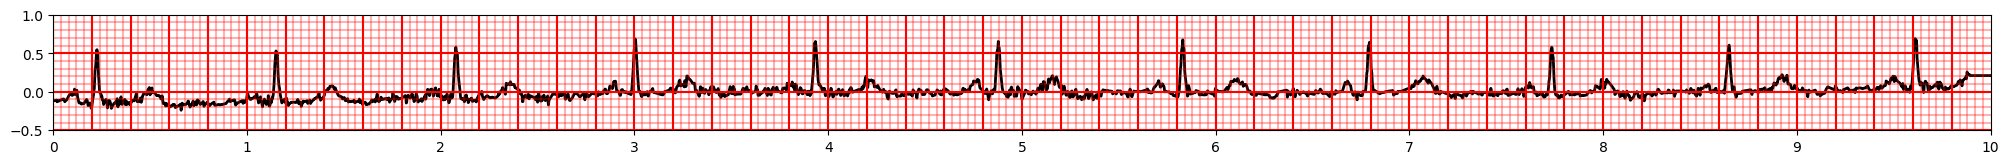

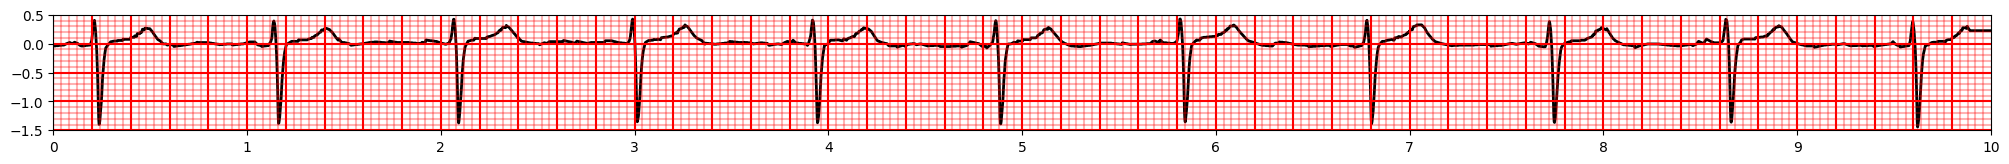

{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}


In [11]:

dataset = ptbxl.PTBXL(sampling_rate=ptbxl.SamplingRate.HZ_500)
record = dataset.load_record(1)
record.draw_ecg(ptbxl.Lead.I)
record.draw_ecg(ptbxl.Lead.V2)
print(record.scp_codes)

In [ ]:
import numpy as np

preprocessed_file_path = 'preprocessed_data/ptbxl.npz'

if not os.path.exists(preprocessed_file_path):
  X, y, data, classes = dataset.load_all()
  
  #Print classes
  print("Classes: ", classes)

  #preprocess
  X_train_scale, y_train, X_test_scale, y_test, X_val_scale, y_val = preprocess(X, y, data)

  print("X_train_scale shape: ", X_train_scale.shape)
  print("y_train shape: ", y_train.shape)
  print("X_test_scale shape: ", X_test_scale.shape)
  print("y_test shape: ", y_test.shape)
  print("X_val_scale shape: ", X_val_scale.shape)
  print("y_val shape: ", y_val.shape)

  # Save the preprocessed data
  
  # Create the directory if it doesn't exist
  os.makedirs(os.path.dirname(preprocessed_file_path), exist_ok=True)

  # Save the preprocessed data to a compressed .npz file
  np.savez_compressed(preprocessed_file_path, X_train_scale=X_train_scale, y_train=y_train, \
              X_test_scale=X_test_scale, y_test=y_test, X_val_scale=X_val_scale, y_val=y_val,\
              classes=classes)
else:
  print(f"Preprocessed data already exists at {preprocessed_file_path}. Loading it...")

# Load the preprocessed data
data = np.load(preprocessed_file_path, allow_pickle=True)
X_train_scale = data['X_train_scale']
y_train = data['y_train']
X_test_scale = data['X_test_scale']
y_test = data['y_test']
X_val_scale = data['X_val_scale']
y_val = data['y_val']

classes = data['classes']
print("Loaded classes: ", classes)



print("Preprocessed data saved and loaded successfully.")






Preprocessed data already exists at preprocessed_data/ptbxl.npz. Loading it...
Loaded classes:  ['CD' 'HYP' 'MI' 'NORM' 'STTC']
Preprocessed data saved and loaded successfully.
